# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import acquire
import prepare

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.options.display.max_columns = None


In [9]:
#setting a seed

seed = 42

# Acquire and Preparing data

In [10]:
data = acquire.get_telco_data()

In [11]:
data = prepare.prep_telco(data)

In [12]:
data.head()

,senior_citizen,tenure,monthly_charges,total_charges,contract_type,internet_service_type,churn_Yes,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.6,593.30,One year,DSL,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1
1,0,9,59.9,542.40,Month-to-month,DSL,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
2,0,4,73.9,280.85,Month-to-month,Fiber optic,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
3,1,13,98.0,1237.85,Month-to-month,Fiber optic,1,1,1,0,1,0,0,1,1,0,1,1,1,1,0,0,0,1,0,0,0,1,0
4,1,3,83.9,267.40,Month-to-month,Fiber optic,1,0,1,0,1,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1


In [13]:
data.dtypes

senior_citizen                              int64
tenure                                      int64
monthly_charges                           float64
total_charges                             float64
contract_type                              object
internet_service_type                      object
churn_Yes                                   uint8
gender_Male                                 uint8
partner_Yes                                 uint8
dependents_Yes                              uint8
phone_service_Yes                           uint8
multiple_lines_Yes                          uint8
online_security_Yes                         uint8
online_backup_Yes                           uint8
device_protection_Yes                       uint8
tech_support_Yes                            uint8
streaming_tv_Yes                            uint8
streaming_movies_Yes                        uint8
paperless_billing_Yes                       uint8
contract_type_Month-to-month                uint8


In [14]:
train, val, test = prepare.split_train_test(data, 'churn_Yes')

In [15]:
train.shape, val.shape, test.shape

((3521, 29), (2113, 29), (1409, 29))

In [16]:
train.head(2)

,senior_citizen,tenure,monthly_charges,total_charges,contract_type,internet_service_type,churn_Yes,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5707,1,63,108.5,6991.9,Two year,Fiber optic,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0
2889,0,4,24.1,73.1,One year,None,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


# Q1 Is whether or not a customer churns independent of their internet service type?

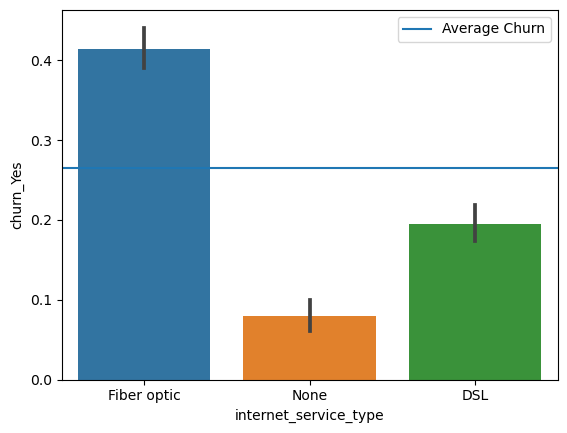

In [17]:
sns.barplot(x='internet_service_type', y='churn_Yes', data=train)
churn_rate = train.churn_Yes.mean()
plt.axhline(churn_rate, label="Average Churn")
plt.legend()
plt.show()

Null hypothesis here is that there is no relationship between internet service type and churn status

Alternative hypothesis is that there *is* a relationship beteween the two


In [18]:
observed = pd.crosstab(train.internet_service_type, train.churn_Yes)

In [19]:
observed

churn_Yes,0,1
internet_service_type,,
DSL,998,242
Fiber optic,892,632
None,697,60


In [20]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [21]:
chi2, p, degf, expected

(340.2562919671569,
 1.3010230258879231e-74,
 2,
 array([[ 911.07071855,  328.92928145],
        [1119.73530247,  404.26469753],
        [ 556.19397898,  200.80602102]]))

In [22]:
alpha = .05

In [23]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

alpha = .05
print('Is p-value < alpha?', p < alpha)

Observed Values

[[998 242]
 [892 632]
 [697  60]]
---
Expected Values

[[ 911  328]
 [1119  404]
 [ 556  200]]
---

chi^2 = 340.2563
p     = 0.0000
Is p-value < alpha? True


Takeaways:

- According to the Chi2 test, there *is* a relationship between internet service type and churn. The chi^2 value is very high, with the p-value being very low, meaning there is a large difference in the observed and expected values.

- There are significantly more people who had fiber optic internet that churned than people who had DSL or who had no internet.

- Customers with DSL and no internet are well below average when it comes to customers who have churned, while fiber optic is way above average

# Q2 Are contract type and churn status related?


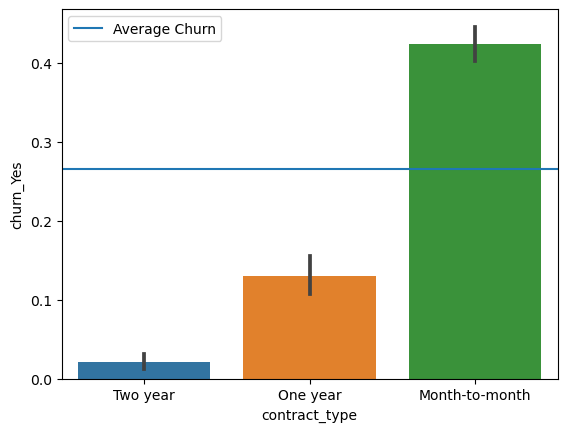

In [24]:
sns.barplot(x='contract_type', y='churn_Yes', data=train)
churn_rate = train.churn_Yes.mean()
plt.axhline(churn_rate, label="Average Churn")
plt.legend()
plt.show()

Null Hypothesis here is that there is *no* relationship between contract type and churn

Alternative Hypothesis here is that there *is* a relationship between contract type and churn

In [25]:
observed2 = pd.crosstab(train.contract_type, train.churn_Yes)
observed2

churn_Yes,0,1
contract_type,,
Month-to-month,1116,821
One year,634,95
Two year,837,18


In [27]:
chi2, p, degf, expected = stats.chi2_contingency(observed2)

chi2, p, degf, expected

(579.6971753504483,
 1.319343206618824e-126,
 2,
 array([[1423.1806305 ,  513.8193695 ],
        [ 535.62141437,  193.37858563],
        [ 628.19795513,  226.80204487]]))

In [29]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

print('Is p-value < alpha?', p < alpha)


Observed Values

[[998 242]
 [892 632]
 [697  60]]
---
Expected Values

[[1423  513]
 [ 535  193]
 [ 628  226]]
---

chi^2 = 579.6972
p     = 0.0000
Is p-value < alpha? True


Takeaways:

- According to the chi^2 test, there *is a relationship between contract type and customers who have churned.

- A **significantly** larger percentage of people who were month-to-month churned verus the other two categories

- There *were* a lot more customers who had month-to-month contracts than those who had one or two year contracts, but even still the percentage is much higher. The number of one and two year contract customers who churn are well below the average, while those who are month to month are way above.

# Q3 What is the relationship between phone service and churn?

<AxesSubplot:xlabel='phone_service_Yes', ylabel='churn_Yes'>

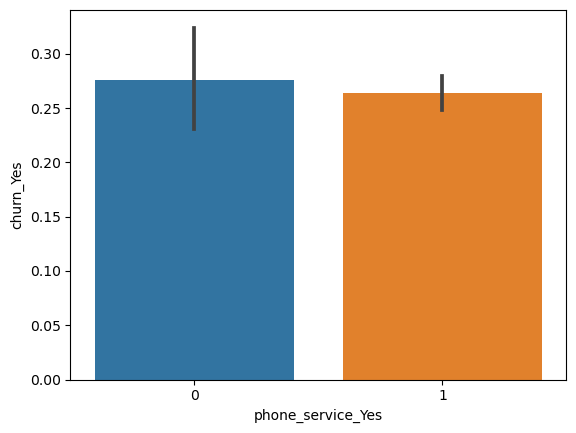

In [36]:
sns.barplot(x='phone_service_Yes', y='churn_Yes', data=train)

Takeaways:

- The churn rates for customers who had phone service and those who didn't is very similar, though the confidence interval for those who didn't churn is much larger

# Q4 Does Gender factor into churn?

<AxesSubplot:xlabel='gender_Male', ylabel='churn_Yes'>

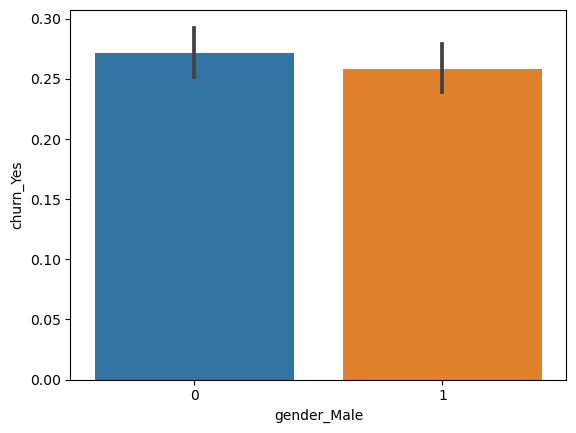

In [31]:
sns.barplot(x='gender_Male', y='churn_Yes', data=train)

Takeaways:

- The churn rate for for males and females are very similar, so it is not likely that gender plays a significant role in churn

# Q5 Do monthly charges differ for different contract types?

<AxesSubplot:xlabel='contract_type', ylabel='monthly_charges'>

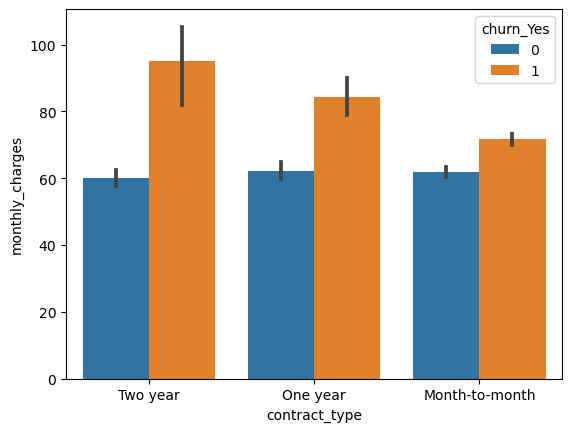

In [34]:
sns.barplot(x='contract_type', y='monthly_charges',
            hue='churn_Yes', data=train)

Takeaways:

- Monthly charges do vary somewhat when compared to contract type and if they've churned, however when comparing those same variables to customers who haven't churned, monthly charges are consistent across the board.

- Charges for customers who churned are all higher than those who haven't.


Overall takeaways and what I plan to use for my models: